In [77]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime


In [2]:
df=pd.read_csv('/content/TSLA.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
df.shape

(2416, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


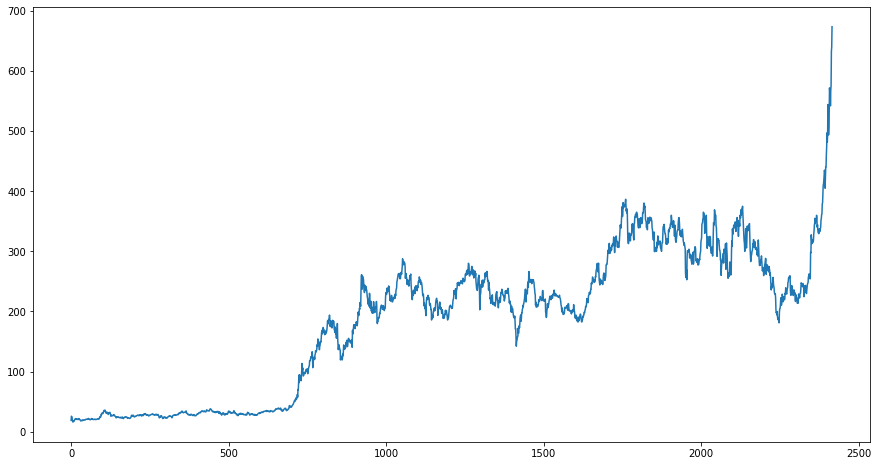

In [7]:
df['Open'].plot(figsize=(15,8))

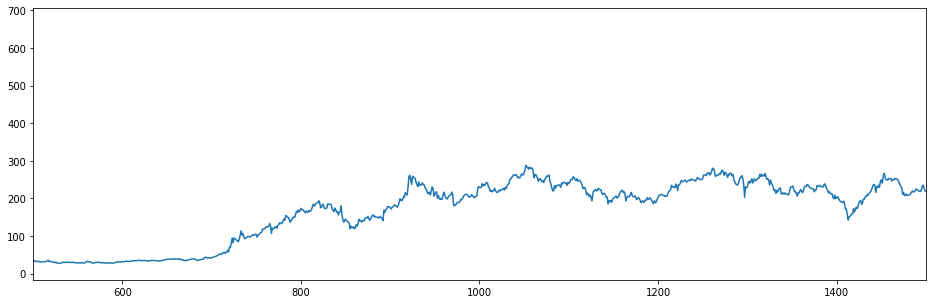

In [8]:
df['Open'].plot(xlim=[500,1500],figsize=(16,5))

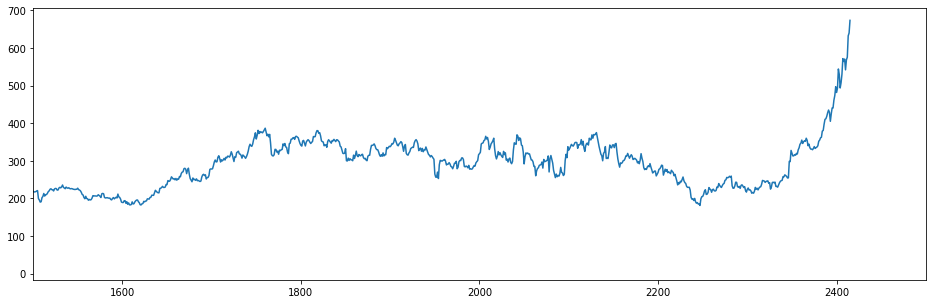

In [9]:
df['Open'].plot(xlim=[1500,2500],figsize=(16,5))

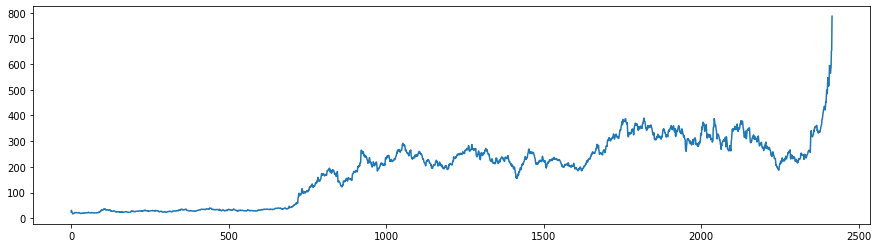

In [10]:
df['High'].plot(figsize=(15,4))

In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
data=df.copy()

In [13]:
df.set_index('Date',drop=True,inplace=True)

In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


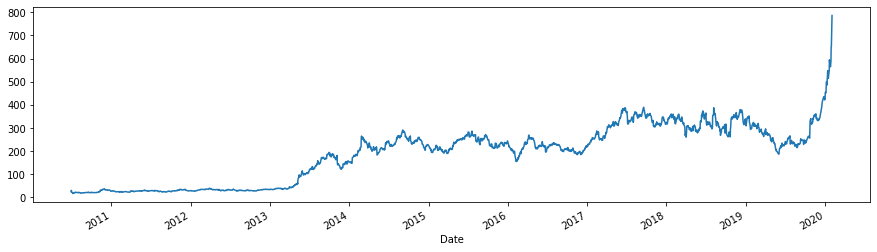

In [15]:
df['High'].plot(figsize=(15,4))

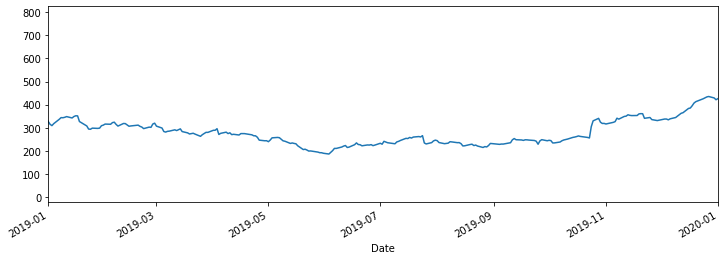

In [16]:
df['High'].plot(xlim=['2019-01-01','2020-01-01'],figsize=(12,4))

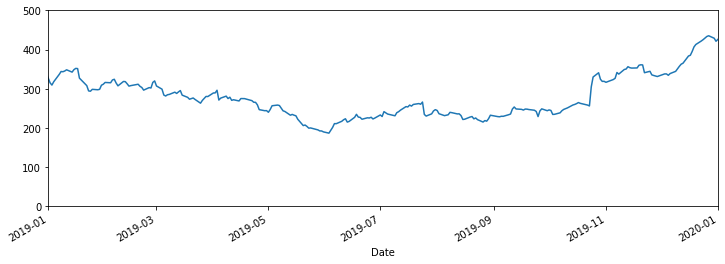

In [17]:
df['High'].plot(xlim=['2019-01-01','2020-01-01'],ylim=[0,500],figsize=(12,4))

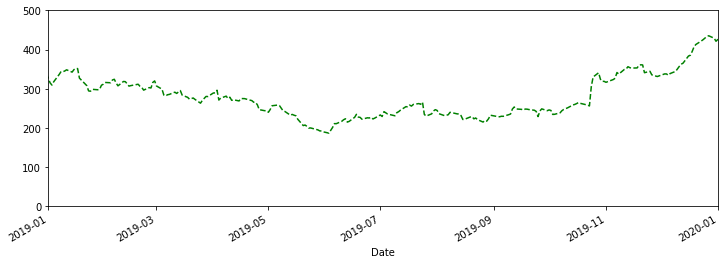

In [18]:
df['High'].plot(xlim=['2019-01-01','2020-01-01'],ylim=[0,500],figsize=(12,4),ls='--',c='green')

In [19]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03'],
              dtype='datetime64[ns]', name='Date', length=2416, freq=None)

In [20]:
share_open=df.loc['2019-01-01':'2020-02-03']['Open']

In [21]:
index=df.loc['2019-01-01':'2020-02-03']['Open'].index

In [22]:
share_open

Date
2019-01-02    306.100006
2019-01-03    307.000000
2019-01-04    306.000000
2019-01-07    321.720001
2019-01-08    341.959991
                 ...    
2020-01-28    568.489990
2020-01-29    575.690002
2020-01-30    632.419983
2020-01-31    640.000000
2020-02-03    673.690002
Name: Open, Length: 274, dtype: float64

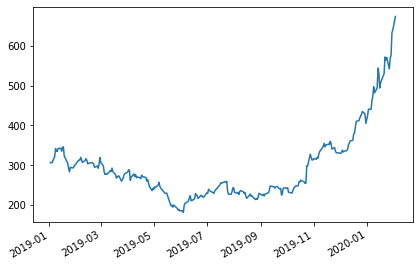

In [23]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

Time resampling

In [24]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [25]:
df.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,16.139999,16.629999,14.980000,15.800000,15.800000,118500
2011-12-31,21.780001,22.270000,21.110001,21.830000,21.830000,239600
2012-12-31,26.620001,26.850000,22.639999,22.790001,22.790001,364900
2013-12-31,33.080002,33.380001,32.110001,32.910000,32.910000,440200
2014-12-31,140.500000,147.000000,136.669998,139.339996,139.339996,1332200
2015-12-31,185.830002,189.289993,181.399994,185.000000,185.000000,708000
2016-12-31,142.320007,154.970001,141.050003,143.669998,143.669998,1659500
2017-12-31,214.750000,220.330002,210.960007,216.990005,216.990005,2186700
2018-12-31,252.779999,260.329987,244.589996,250.559998,250.559998,3080700


In [26]:
df.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,35.869999,36.419998,34.750000,35.470001,35.470001,18766300
2011-12-31,34.630001,35.000000,34.029999,34.939999,34.939999,11517800
2012-12-31,38.189999,39.950001,37.110001,38.009998,38.009998,5680400
2013-12-31,193.960007,194.500000,188.369995,193.369995,193.369995,37163900
2014-12-31,287.670013,291.420013,280.399994,286.040009,286.040009,32681700
2015-12-31,280.200012,286.649994,276.299988,282.260010,282.260010,15649600
2016-12-31,266.450012,269.339996,254.509995,265.420013,265.420013,23742400
2017-12-31,386.690002,389.609985,379.350006,385.000000,385.000000,19791400
2018-12-31,375.000000,387.459991,367.119995,379.570007,379.570007,33649700


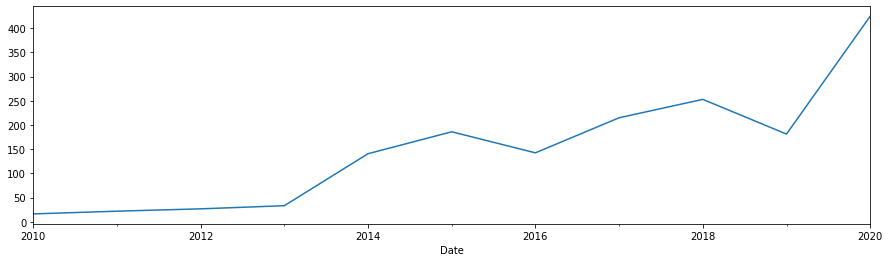

In [27]:
df.resample(rule='A').min()['Open'].plot(figsize=(15,4))

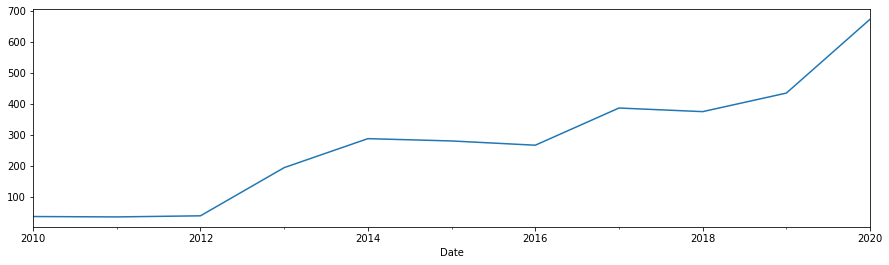

In [28]:
df.resample(rule='A').max()['Open'].plot(figsize=(15,4))

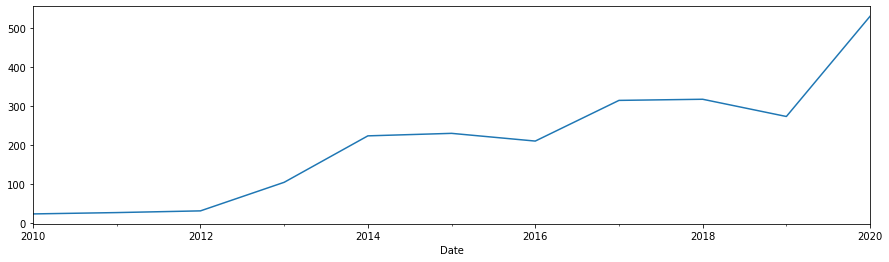

In [29]:
df.resample(rule='A').mean()['Open'].plot(figsize=(15,4))

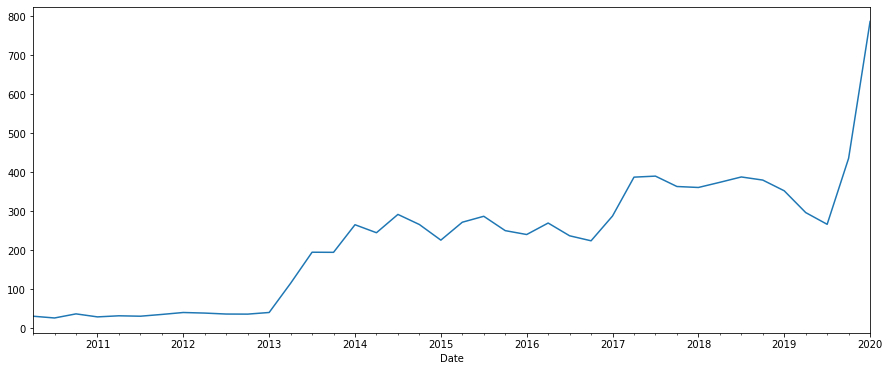

In [30]:
df.resample(rule='QS').max()['High'].plot(figsize=(15,6))

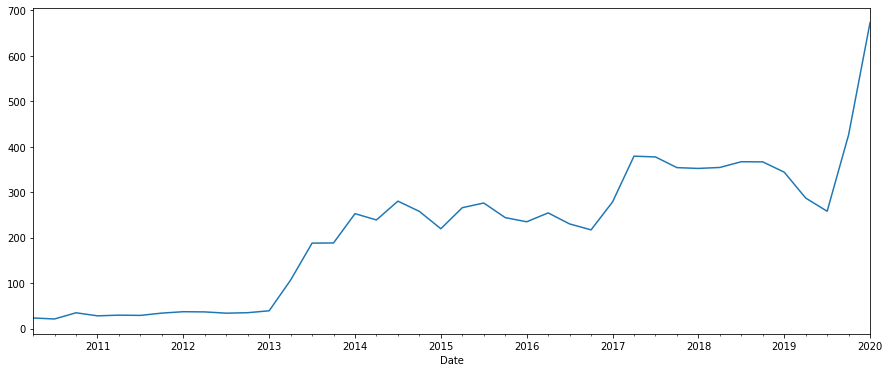

In [31]:
df.resample(rule='QS').max()['Low'].plot(figsize=(15,6))

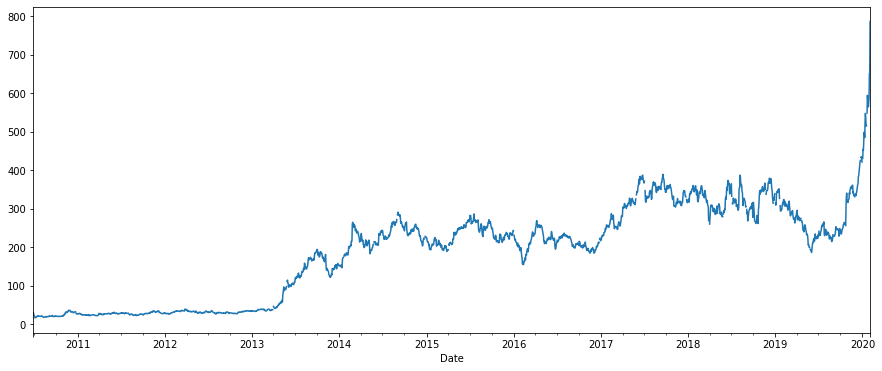

In [32]:
#business day
df.resample(rule='B').max()['High'].plot(figsize=(15,6))

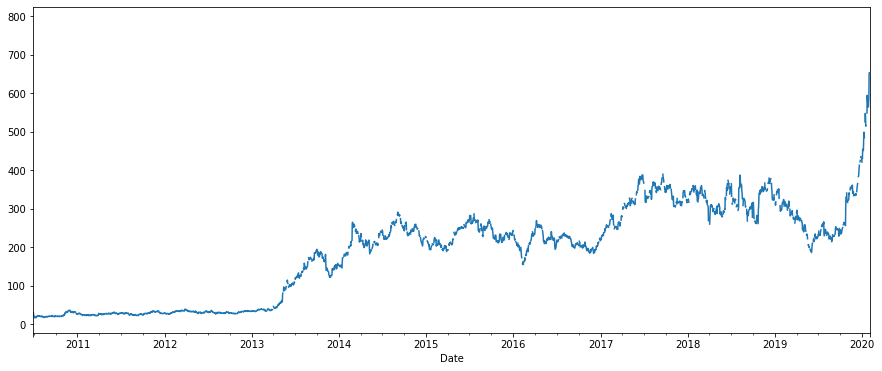

In [33]:
df.resample(rule='D').max()['High'].plot(figsize=(15,6))

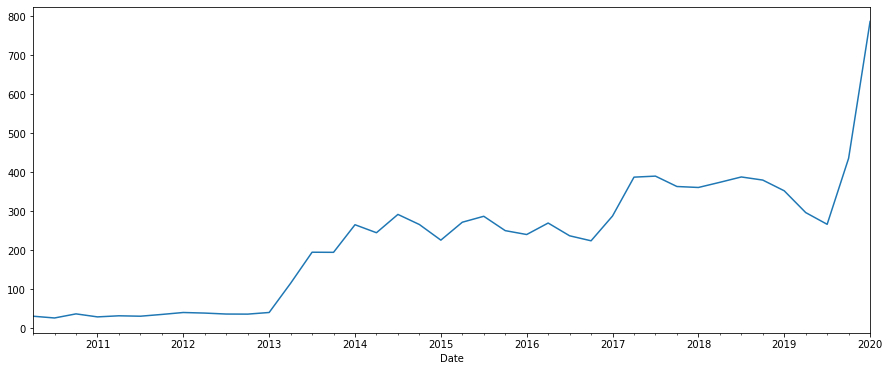

In [34]:
df.resample(rule='BQS').max()['High'].plot(figsize=(15,6))

In [35]:
df['High'].rolling(10).max().head(20)

Date
2010-06-29      NaN
2010-06-30      NaN
2010-07-01      NaN
2010-07-02      NaN
2010-07-06      NaN
2010-07-07      NaN
2010-07-08      NaN
2010-07-09      NaN
2010-07-12      NaN
2010-07-13    30.42
2010-07-14    30.42
2010-07-15    25.92
2010-07-16    23.10
2010-07-19    22.25
2010-07-20    22.25
2010-07-21    22.25
2010-07-22    22.25
2010-07-23    22.25
2010-07-26    22.25
2010-07-27    22.25
Name: High, dtype: float64

In [45]:
##simple moving average
df['Open:30 days rolling']=df['Open'].rolling(30).mean()

In [46]:
df.head(32)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,NaN
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,NaN
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,NaN
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,NaN
2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,NaN
2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400,NaN
2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600,NaN
2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500,NaN


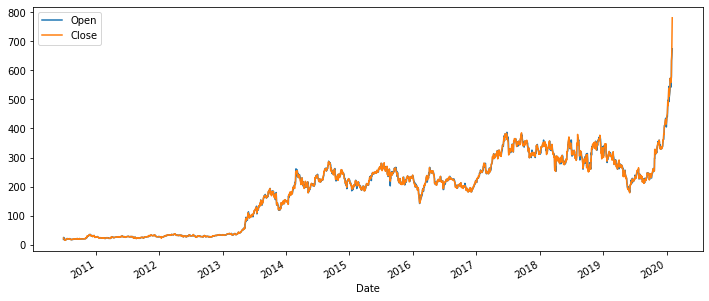

In [47]:
df[['Open','Close']].plot(figsize=(12,5))

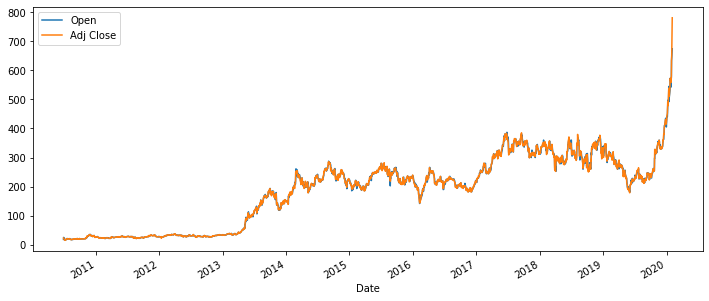

In [48]:
df[['Open','Adj Close']].plot(figsize=(12,5))

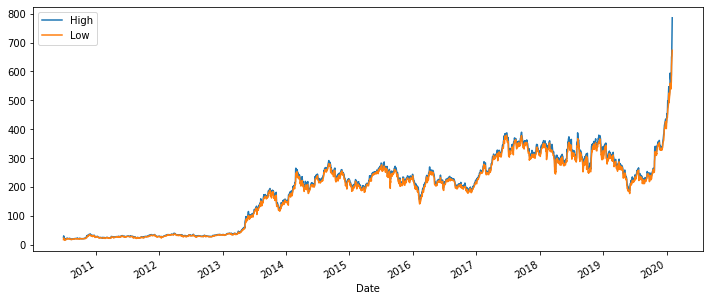

In [49]:
df[['High','Low']].plot(figsize=(12,5))

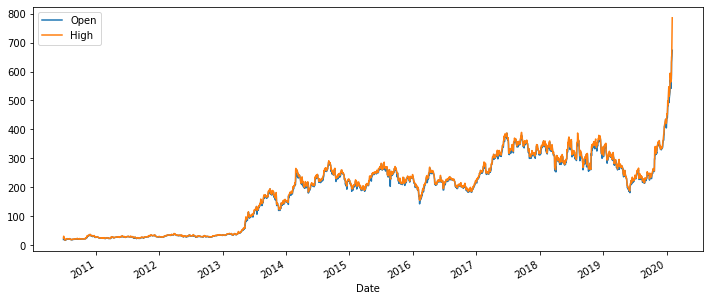

In [50]:
df[['Open','High']].plot(figsize=(12,5))

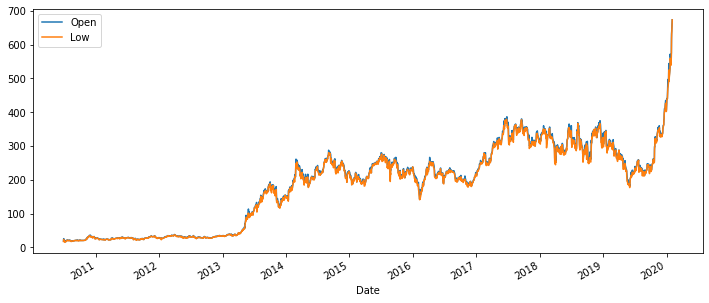

In [51]:
df[['Open','Low']].plot(figsize=(12,5))

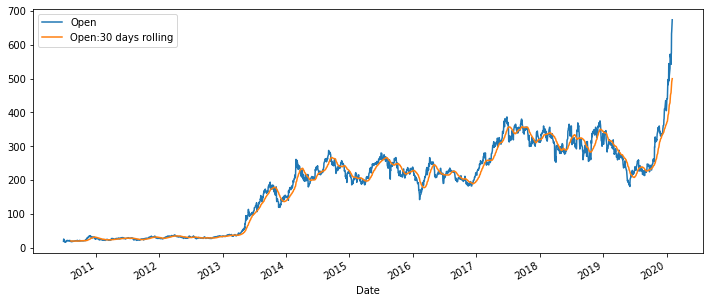

In [52]:
df[['Open','Open:30 days rolling']].plot(figsize=(12,5))

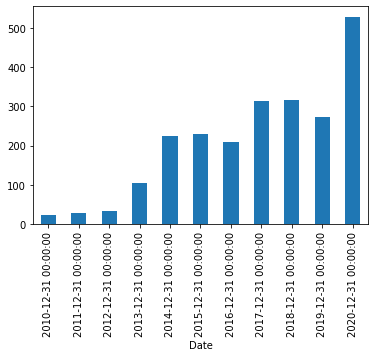

In [53]:
df['Open'].resample(rule='A').mean().plot(kind='bar')

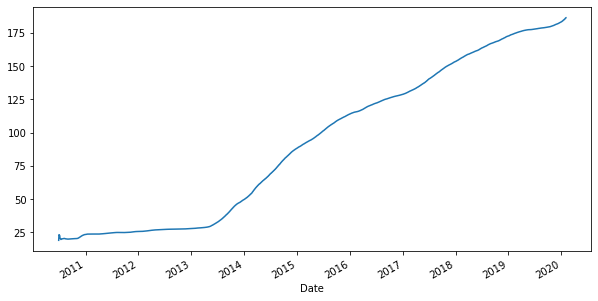

In [56]:
##cumulative moving average
#expanding
df['Open'].expanding().mean().plot(figsize=(10,5))
df['CMA_open']=df['Open'].expanding().mean()

In [58]:
df.head(40)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling,CMA_open
Date,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,NaN,19.000000
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,NaN,22.395001
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,NaN,23.263334
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,NaN,23.197500
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,NaN,22.558000
2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,NaN,21.531667
2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400,NaN,20.761429
2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600,NaN,20.363750
2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500,NaN,20.095556


In [59]:
##EWMA 
#lets smoothing factor alpha be 0.1
df['EWMA_0.1_open']=df['Open'].ewm(alpha=0.1,adjust=False).mean()

In [68]:
df['EWMA_5_days_open']=df['Open'].ewm(span=5).mean()

In [66]:
df['EWMA_0.4_open']=df['Open'].ewm(alpha=0.4,adjust=False).mean()

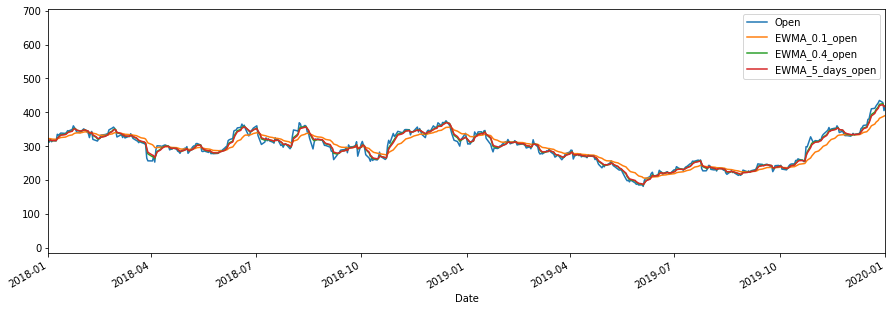

In [69]:
df[['Open','EWMA_0.1_open','EWMA_0.4_open','EWMA_5_days_open']].plot(xlim=['2018-01-01','2020-01-01'],figsize=(15,5))

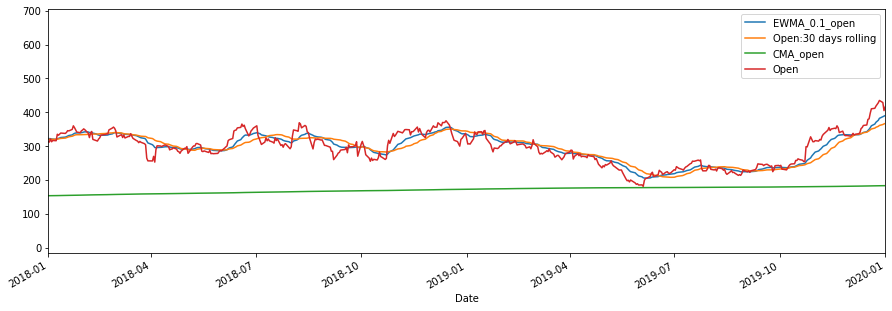

In [62]:
df[['EWMA_0.1_open','Open:30 days rolling','CMA_open','Open']].plot(xlim=['2018-01-01','2020-01-01'],figsize=(15,5))

In [71]:
df.head(32)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling,CMA_open,EWMA_0.1_open,EWMA_0.4_open,EWMA_5_days_open
Date,,,,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,NaN,19.000000,19.000000,19.000000,19.000000
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,NaN,22.395001,19.679000,21.716000,23.074001
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,NaN,23.263334,20.211100,23.029600,23.986316
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,NaN,23.197500,20.489990,23.017760,23.576616
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,NaN,22.558000,20.440991,21.810656,22.203602
2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,NaN,21.531667,20.036892,19.646394,20.082887
2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400,NaN,20.761429,19.647203,18.243836,18.686887
2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600,NaN,20.363750,19.440482,17.978301,18.302943
2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500,NaN,20.095556,19.291434,17.966981,18.182154


In [121]:
df=pd.read_csv('/content/airline_passengers.csv')

In [122]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [124]:
df.shape

(144, 2)

In [125]:
df.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [126]:
import statsmodels.api as plt

In [127]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [128]:
df['Month']=pd.to_datetime(df['Month'])

In [129]:
df.set_index('Month',drop=True,inplace=True)

In [130]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


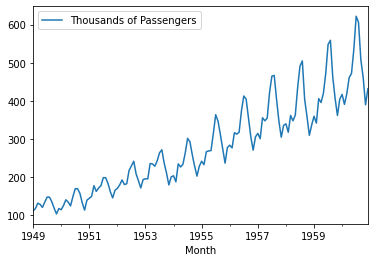

In [131]:
df.plot()

The above plot shows seasonality in data


In [132]:
from statsmodels.tsa.stattools import adfuller


In [133]:
def adf_test(series):
  result=adfuller(series)
  print("ADF statistics: {}".format(result[0]))
  print("p- value: {}".format(result[1]))
  if result[1] <= 0.05:
    print("Strong evidence again  null hypothesis,reject null hypothesis,indication data is stationary")
  else:
    print("Weak evidence against null hypothesis, time series has a unit root indicating data is not stationary")  


In [134]:
adf_test(df['Thousands of Passengers'])

ADF statistics: 0.8153688792060472
p- value: 0.991880243437641
Weak evidence against null hypothesis, time series has a unit root indicating data is not stationary


In [135]:
## differencing is done here 
df['Thousands of Passengers_1diff']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1);

In [136]:
df.head()

,Thousands of Passengers,Thousands of Passengers_1diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [137]:
adf_test(df['Thousands of Passengers_1diff'].dropna())

ADF statistics: -2.8292668241700056
p- value: 0.054213290283824704
Weak evidence against null hypothesis, time series has a unit root indicating data is not stationary


In [138]:
df['Thousands of Passengers_2diff']=df['Thousands of Passengers_1diff']-df['Thousands of Passengers_1diff'].shift(1);

In [139]:
adf_test(df['Thousands of Passengers_2diff'].dropna())

ADF statistics: -16.384231542468495
p- value: 2.7328918500143186e-29
Strong evidence again  null hypothesis,reject null hypothesis,indication data is stationary


In [140]:
#we can say that our d=2 as two differencing is done
#but in seasonal data we work on 12 months ie year so we will do differencing for 12 on orginal data 
df['Thousands of Passengers_12diff']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12);

In [141]:
adf_test(df['Thousands of Passengers_12diff'].dropna())

ADF statistics: -3.383020726492481
p- value: 0.011551493085514952
Strong evidence again  null hypothesis,reject null hypothesis,indication data is stationary


In [142]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

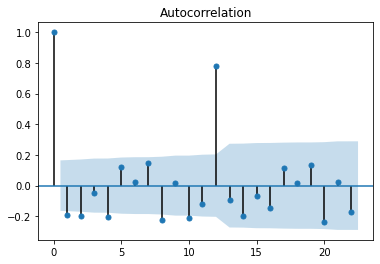

In [143]:
acf=plot_acf(df['Thousands of Passengers_2diff'].dropna())

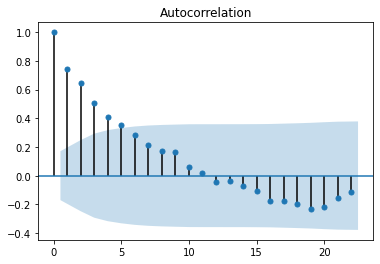

In [145]:
acf=plot_acf(df['Thousands of Passengers_12diff'].dropna())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


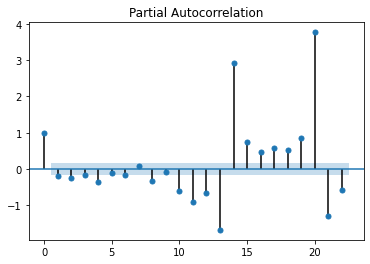

In [146]:
pacf=plot_pacf(df['Thousands of Passengers_2diff'].dropna())

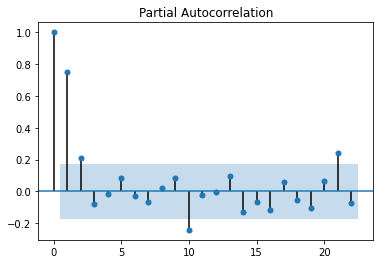

In [147]:
pacf=plot_pacf(df['Thousands of Passengers_12diff'].dropna())

In [148]:
## split train and test data
df

,Thousands of Passengers,Thousands of Passengers_1diff,Thousands of Passengers_2diff,Thousands of Passengers_12diff
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [216]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [217]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [218]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [219]:
test_data

,Thousands of Passengers,Thousands of Passengers_1diff,Thousands of Passengers_2diff,Thousands of Passengers_12diff
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [221]:
import statsmodels.api as sms
from statsmodels.tsa.arima_model import ARIMA


In [222]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,0,2)) 
## q=0 here just to check autoregression as if q is 12 then data should be seasonal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [223]:
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [224]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                         ARMA(10, 2)   Log Likelihood                -349.116
Method:                            css-mle   S.D. of innovations             14.070
Date:                     Mon, 28 Feb 2022   AIC                            726.232
Time:                             15:09:35   BIC                            760.263
Sample:                         01-01-1949   HQIC                           739.912
                              - 12-01-1955                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            198.4191     72.592      2.733      0.008      56.141     340.697
ar.L1.Thousands of Passengers      1.8398      0.115     15.976      0.000       1.614       2.066
ar.L2.Thousands of Passengers     -1.7579      0.248     -7.075      0.000      -2.245      -1.271
ar.L3.Thousands of Passengers      1.0864      0.321      3.383      0.001       0.457       1.716
ar.L4.Thousands of Passengers     -0.5995      0.344     -1.745      0.085      -1.273       0.074
ar.L5.Thousands of Passengers      0.5318      0.345      1.539      0.128      -0.145       1.209
ar.L6.Thousands of Passengers     -0.3836      0.345     -1.112      0.270      -1.060       0.292
ar.L7.Thousands of Passengers      0.1459      0.342      0.426      0.671      -0.525       0.817
ar.L8.Thousands of Passengers     -0.0189      0.320     -0.059      0.953      -0.646       0.608
ar.L9.Thousands of Passengers     -0.1252      0.249     -0.502      0.617      -0.614       0.363
ar.L10.Thousands of Passengers     0.2742      0.120      2.295      0.025       0.040       0.508
ma.L1.Thousands of Passengers     -1.0748      0.052    -20.476      0.000      -1.178      -0.972
ma.L2.Thousands of Passengers      0.9992      0.084     11.851      0.000       0.834       1.164
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0034           -0.0000j            1.0034           -0.0000
AR.2             0.8974           -0.5087j            1.0316           -0.0821
AR.3             0.8974           +0.5087j            1.0316            0.0821
AR.4             0.4915           -0.8721j            1.0010           -0.1683
AR.5             0.4915           +0.8721j            1.0010            0.1683
AR.6            -0.0528           -1.2083j            1.2094           -0.2569
AR.7            -0.0528           +1.2083j            1.2094            0.2569
AR.8            -0.8298           -0.8974j            1.2223           -0.3688
AR.9            -0.8298           +0.8974j            1.2223            0.3688
AR.10           -1.5596           -0.0000j            1.5596           -0.5000
MA.1             0.5378           -0.8435j            1.0004           -0.1597
MA.2             0.5378           +0.8435j            1.0004            0.1597
------------------------------------------------------------------------------
"""

In [225]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [226]:
pred

1956-01-01    267.686788
1956-02-01    256.219183
1956-03-01    266.530885
1956-04-01    266.199507
1956-05-01    287.863782
1956-06-01    320.210399
1956-07-01    334.797238
1956-08-01    330.317373
1956-09-01    297.695466
1956-10-01    267.909992
1956-11-01    264.098982
1956-12-01    270.776099
1957-01-01    276.162604
1957-02-01    271.137023
1957-03-01    259.596601
1957-04-01    260.814194
1957-05-01    280.496472
1957-06-01    308.209844
1957-07-01    323.930001
1957-08-01    313.546233
1957-09-01    287.471619
1957-10-01    267.782454
1957-11-01    266.379286
1957-12-01    276.953516
1958-01-01    281.920962
1958-02-01    272.508580
1958-03-01    258.434745
1958-04-01    256.973801
1958-05-01    275.215300
1958-06-01    300.868268
1958-07-01    312.822199
1958-08-01    301.839788
1958-09-01    278.997523
1958-10-01    264.547232
1958-11-01    268.256352
1958-12-01    280.639369
1959-01-01    284.194566
1959-02-01    272.300774
1959-03-01    256.436957
1959-04-01    254.524747


In [227]:
residuals

Month
1956-01-01     16.313212
1956-02-01     20.780817
1956-03-01     50.469115
1956-04-01     46.800493
1956-05-01     30.136218
1956-06-01     53.789601
1956-07-01     78.202762
1956-08-01     74.682627
1956-09-01     57.304534
1956-10-01     38.090008
1956-11-01      6.901018
1956-12-01     35.223901
1957-01-01     38.837396
1957-02-01     29.862977
1957-03-01     96.403399
1957-04-01     87.185806
1957-05-01     74.503528
1957-06-01    113.790156
1957-07-01    141.069999
1957-08-01    153.453767
1957-09-01    116.528381
1957-10-01     79.217546
1957-11-01     38.620714
1957-12-01     59.046484
1958-01-01     58.079038
1958-02-01     45.491420
1958-03-01    103.565255
1958-04-01     91.026199
1958-05-01     87.784700
1958-06-01    134.131732
1958-07-01    178.177801
1958-08-01    203.160212
1958-09-01    125.002477
1958-10-01     94.452768
1958-11-01     41.743648
1958-12-01     56.360631
1959-01-01     75.805434
1959-02-01     69.699226
1959-03-01    149.563043
1959-04-01    141.4

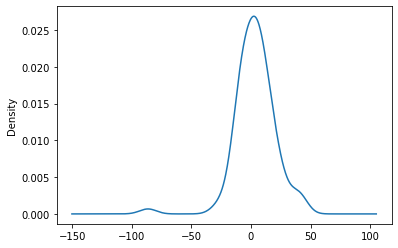

In [228]:
model_Arima_fit.resid.plot(kind='kde')

In [229]:
test_data['Predicted_Arima']=pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [230]:
test_data

,Thousands of Passengers,Thousands of Passengers_1diff,Thousands of Passengers_2diff,Thousands of Passengers_12diff,Predicted_Arima
Month,,,,,
1956-01-01,284,6.0,-35.0,42.0,267.686788
1956-02-01,277,-7.0,-13.0,44.0,256.219183
1956-03-01,317,40.0,47.0,50.0,266.530885
1956-04-01,313,-4.0,-44.0,44.0,266.199507
1956-05-01,318,5.0,9.0,48.0,287.863782
1956-06-01,374,56.0,51.0,59.0,320.210399
1956-07-01,413,39.0,-17.0,49.0,334.797238
1956-08-01,405,-8.0,-47.0,58.0,330.317373
1956-09-01,355,-50.0,-42.0,43.0,297.695466


In [231]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [232]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [233]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [234]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:            Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, 0, 12)   Log Likelihood                -265.240
Date:                            Mon, 28 Feb 2022   AIC                            548.481
Time:                                    15:11:41   BIC                            568.971
Sample:                                01-01-1949   HQIC                           556.638
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5977      0.938      0.638      0.524      -1.240       2.435
ar.L2          0.8311      0.232      3.583      0.000       0.376       1.286
ar.L3         -0.4519      0.894     -0.506      0.613      -2.203       1.300
ma.L1          0.1844      1.164      0.158      0.874      -2.098       2.466
ma.L2         -0.5336      1.262     -0.423      0.672      -3.007       1.940
ma.L3         -0.0987      0.384     -0.257      0.797      -0.852       0.654
ma.L4         -0.1274      0.338     -0.377      0.706      -0.789       0.534
ma.L5          0.2470      0.357      0.692      0.489      -0.452       0.946
sigma2        87.7355     81.196      1.081      0.280     -71.406     246.877
===================================================================================
Ljung-Box (Q):                       27.22   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.94   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [235]:
test_data.tail()

,Thousands of Passengers,Thousands of Passengers_1diff,Thousands of Passengers_2diff,Thousands of Passengers_12diff,Predicted_Arima
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,283.530567
1960-09-01,508,-98.0,-82.0,45.0,264.722143
1960-10-01,461,-47.0,51.0,54.0,258.553007
1960-11-01,390,-71.0,-24.0,28.0,269.102767
1960-12-01,432,42.0,113.0,27.0,282.885446


In [236]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [241]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,1,1),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima



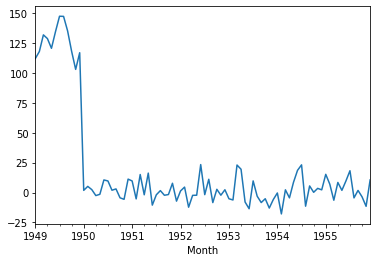

In [242]:
model_SARIMA_fit.resid.plot()

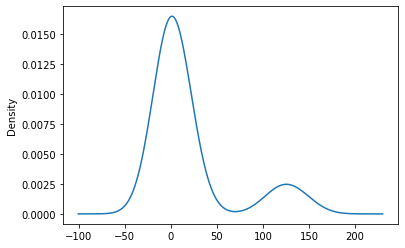

In [243]:
model_SARIMA_fit.resid.plot(kind='kde')

In [244]:
test_data['Predicted_SARIMA']=pred_Sarima

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [246]:
df.head()

,Thousands of Passengers,Thousands of Passengers_1diff,Thousands of Passengers_2diff,Thousands of Passengers_12diff
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [247]:
test_data

,Thousands of Passengers,Thousands of Passengers_1diff,Thousands of Passengers_2diff,Thousands of Passengers_12diff,Predicted_Arima,Predicted_SARIMA
Month,,,,,,
1956-01-01,284,6.0,-35.0,42.0,267.686788,286.182858
1956-02-01,277,-7.0,-13.0,44.0,256.219183,281.276759
1956-03-01,317,40.0,47.0,50.0,266.530885,309.914954
1956-04-01,313,-4.0,-44.0,44.0,266.199507,310.675460
1956-05-01,318,5.0,9.0,48.0,287.863782,311.335220
1956-06-01,374,56.0,51.0,59.0,320.210399,354.949687
1956-07-01,413,39.0,-17.0,49.0,334.797238,403.398866
1956-08-01,405,-8.0,-47.0,58.0,330.317373,385.071899
1956-09-01,355,-50.0,-42.0,43.0,297.695466,349.447070


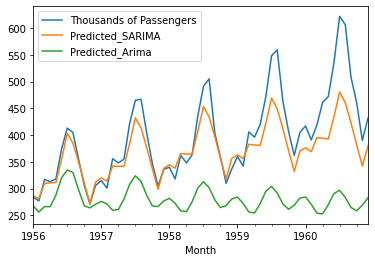

In [248]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_Arima']].plot()
